In [7]:
import pandas as pd

data = pd.read_csv('gym_members_exercise_tracking.csv', sep=';')
print(data.head(5))

   ID  Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   1   56    Male         88.3        1.71      180      157           60   
1   2   46  Female         74.9        1.53      179      151           66   
2   3   32  Female         68.1        1.66      167      122           54   
3   4   25    Male         53.2        1.70      190      164           56   
4   5   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_

In [52]:
def weight_level(weight, height):
    weight_level = weight/(height*height)
    if weight_level < 18.5:
        level = 'Low weight'
    elif weight_level >= 18.5 and weight_level <= 24.9:
        level = 'Normal weight'
    elif weight_level >= 25 and weight_level <= 29.9:
        level = 'Overweight'
    elif weight_level >= 30 and weight_level <= 34.9:
        level = 'Obesity level 1'
    elif weight_level >= 35 and weight_level <= 39.9:
        level = 'Obesity level 2'
    else:
        level = 'Obesity level 3'
    return level

data['weight_level'] = data.apply(lambda row: weight_level(row['Weight (kg)'], row['Height (m)']),axis=1)

data.head()

,ID,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,weight_level
0,1,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,Obesity level 1
1,2,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,Obesity level 1
2,3,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,Normal weight
3,4,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,Low weight
4,5,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,Low weight


In [82]:
def avarage_time():
    sumMale = sumFemale = timeMale = timeFemale = 0
    
    for i in range(len(data)):
    
        if data['Gender'].iloc[i] == 'Male':
            sumMale+=1
            timeMale += data['Session_Duration (hours)'].iloc[i]
        else:
            sumFemale+=1
            timeFemale += data['Session_Duration (hours)'].iloc[i]
    menAvarageTime = timeMale/sumMale
    womenAvarageTime = timeFemale/sumFemale

    print(f'Média de tempo dos homens na academia é de {round(menAvarageTime, 2)}, e da mulheres de {round(womenAvarageTime,2)}')

avarage_time()

Média de tempo dos homens na academia é de 1.25, e da mulheres de 1.26


In [90]:
data.rename(columns={'Workout_Frequency (days/week)':'Workout_Frequency (days)'}, inplace = True)
data.head()

,ID,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days),Experience_Level,BMI,weight_level
0,1,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,Obesity level 1
1,2,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,Obesity level 1
2,3,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,Normal weight
3,4,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,Low weight
4,5,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,Low weight


In [100]:
def classify_frequency(frequency):
    
    if frequency >= 0 and frequency <= 2:
        classify = 'Low'
    elif frequency > 2 and frequency <=4:
        classify = 'Normal'
    else:
        classify = 'High'
    return classify

data['Classify frequency'] = data.apply(lambda row: classify_frequency(row['Workout_Frequency (days)']), axis=1)
data

,ID,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days),Experience_Level,BMI,weight_level,Classify frequency
0,1,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,Obesity level 1,Normal
1,2,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,Obesity level 1,Normal
2,3,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,Normal weight,Normal
3,4,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,Low weight,Normal
4,5,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,Low weight,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,969,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77,Overweight,Normal
969,970,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69,Overweight,Low
970,971,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50,Normal weight,High
971,972,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74,Obesity level 2,Normal


In [124]:
def most_frequent_gender():
    maleFrequency = femaleFrequency = sumFemaleFrequency = sumMaleFrequency = 0

    for i in range(len(data)):        
        if data['Gender'].iloc[i] == 'Male':
            maleFrequency+=1
            sumMaleFrequency += data['Workout_Frequency (days)'].iloc[i]
        else:
            femaleFrequency+=1
            sumFemaleFrequency += data['Workout_Frequency (days)'].iloc[i]

    avarageMaleFrequency = sumMaleFrequency/maleFrequency
    avarageFemaleFrequency = sumFemaleFrequency/femaleFrequency
    
    print(f'A frequencia média dos homens é de {round(avarageMaleFrequency,2)} dias, e das mulheres de {round(avarageFemaleFrequency,2)} dias')

most_frequent_gender()

A frequencia média dos homens é de 3.31 dias, e das mulheres de 3.34 dias


In [132]:
# Infantil (0 a 12 anos) 
# Adolescente (13 a 17 anos) 
# Adulto (18 a 64 anos) 
# Idoso (65 anos ou mais) 

def people_for_age_group(age):
    classify = ''

    if age >= 0 and age <= 12:
        classify = 'Kid'
    elif age >= 13 and age <= 17:
        classify = 'Teenager'
    elif age >= 18 and age <= 64:
        classify = 'Adult'
    else:
        classify = 'Elderly'
        
    return classify

data['age_goup'] = data.apply(lambda row: people_for_age_group(row['Age']), axis=1)
data

,ID,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days),Experience_Level,BMI,weight_level,Classify frequency,age_goup
0,1,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,Obesity level 1,Normal,Adult
1,2,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,Obesity level 1,Normal,Adult
2,3,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,Normal weight,Normal,Adult
3,4,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,Low weight,Normal,Adult
4,5,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,Low weight,Normal,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,969,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77,Overweight,Normal,Adult
969,970,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69,Overweight,Low,Adult
970,971,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50,Normal weight,High,Adult
971,972,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74,Obesity level 2,Normal,Adult


In [156]:
# PESSOAS POR TIPO DE TREINO
# Yoga, HIIT, Strength, Cardio

def best_workout_type():
    yoga = hiit = strength = cardio = 0

    for i in range(len(data)):
        if data['Workout_Type'].iloc[i] == 'Yoga':
            yoga += 1
        elif data['Workout_Type'].iloc[i] == 'Strength':
            strength += 1
        elif data['Workout_Type'].iloc[i] == 'HIIT':
            hiit += 1
        else:
            cardio += 1

    bestsList = {}
    bestsList[f'Yoga'] = yoga
    bestsList[f'Strength'] = strength
    bestsList[f'HIIT'] = hiit
    bestsList[f'Cardio'] = cardio

    for i in sorted(bestsList, key = bestsList.get, reverse=True):
        print(i, bestsList[i])

best_workout_type()
            

Strength 258
Cardio 255
Yoga 239
HIIT 221


In [211]:
def gym_time_age_group():
    list_age_group = []
    group20 = group40 = group60 = 0
    
    for i in range(len(data)):
        if data['Age'].iloc[i] >= 0 and data['Age'].iloc[i] <= 20:
            group20+=1
        elif data['Age'].iloc[i] > 20 and data['Age'].iloc[i] <= 40:
            group40+=1
        else:
            group60+=1
    list_age_group.append(group20)
    list_age_group.append(group40)
    list_age_group.append(group60)
    return list_age_group

list_age_group = gym_time_age_group()
print(list_age_group)

[78, 432, 463]


In [176]:
import matplotlib.pyplot as plt
import numpy as np

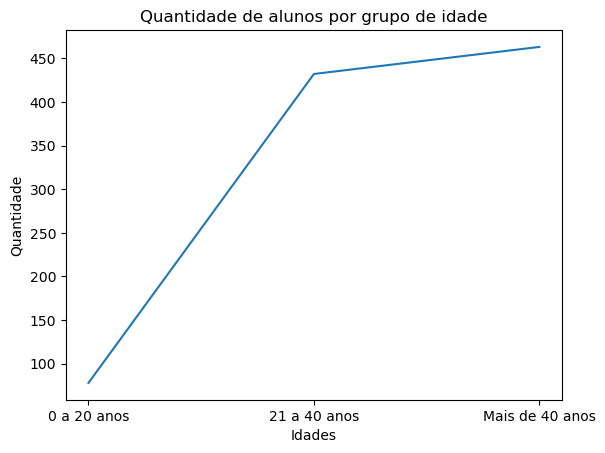

In [225]:
names = ['0 a 20 anos', '21 a 40 anos', 'Mais de 40 anos']
values = [list_age_group[0], list_age_group[1], list_age_group[2]]

plt.plot(names, values)
plt.title('Quantidade de alunos por grupo de idade')
plt.ylabel('Quantidade')
plt.xlabel('Idades')
plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

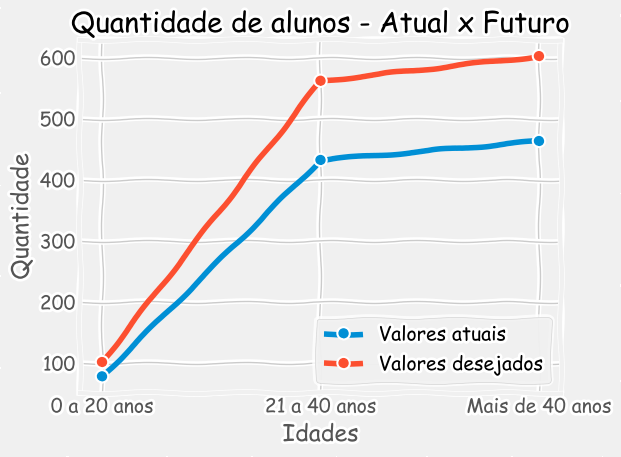

In [339]:
names = ['0 a 20 anos', '21 a 40 anos', 'Mais de 40 anos']
values = [list_age_group[0], list_age_group[1], list_age_group[2]]
futures_values = []

for i in range(len(values)):
    futures_values.append(values[i]*1.3)

plt.plot(names, values,
         marker = 'o',
         label = 'Valores atuais')
plt.plot(names, futures_values,
         marker = 'o',
         label = 'Valores desejados')

plt.title('Quantidade de alunos - Atual x Futuro')
plt.ylabel('Quantidade')
plt.xlabel('Idades')

plt.legend()
plt.tight_layout()
plt.grid(True)

plt.style.use('fivethirtyeight')

plt.show()

In [341]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']